## 一、实验目的
通过复现波士顿房价的回归预测，具备对回归问题的基本理论和解决问题的能力，掌握常见的回归问题建模方法，能够对回归问题进行数据分析、特征工程、建模与结果验证。

## 二、实验内容
复现波士顿房价的回归预测。

## 三、实验步骤
3.1 程序代码

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: RM, dtype: float64
   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


f:\pythonproject\machine_learning_notebooks\lab2\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets includ

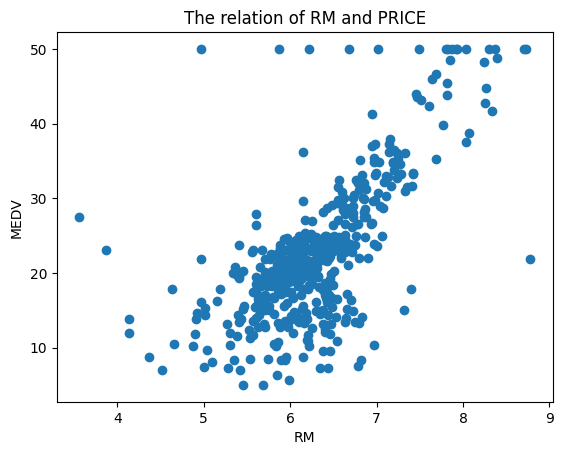

求解截距项为： [-36.18099265]
求解系数为： [[9.31294923]]
预测值前10个为： [[22.7979148 ]
 [21.70829974]
 [23.17043277]
 [13.63397276]
 [21.85730693]
 [18.15075314]
 [18.81197253]
 [19.39868833]
 [10.13230385]
 [23.46844714]]


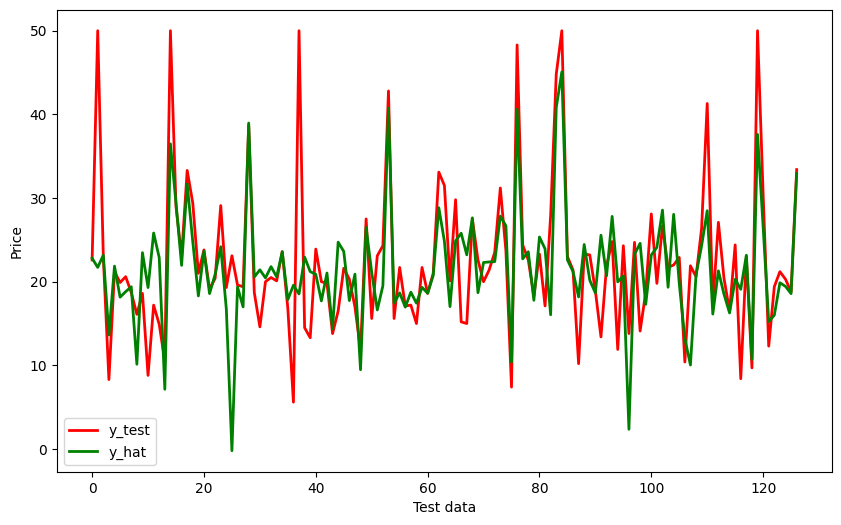

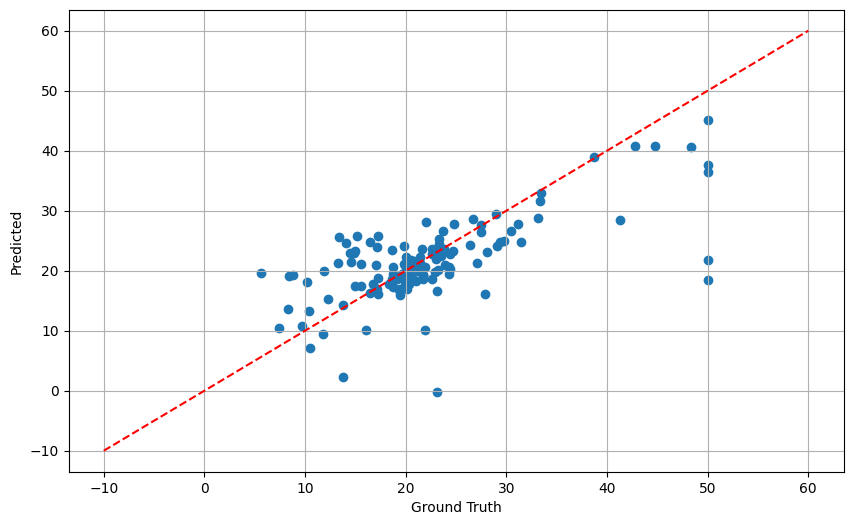

R2: 0.4679000543136781
R2_score: 0.4679000543136781
MAE: 4.212526305455823
MSE: 43.472041677202206
RMSE: 6.593333123481795


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 载入波士顿房价数据集
boston = load_boston()
print(boston.keys())
print(boston.feature_names)

# 数据预处理
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos_target = pd.DataFrame(boston.target, columns=["MEDV"])
print(bos["RM"].head())
print(bos_target.head())

# 绘制房间数量与房价的散点图
X = bos[["RM"]]
y = bos_target
plt.scatter(X, y)
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.title("The relation of RM and PRICE")
plt.show()

# 数据集划分
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# 训练模型
lr = LinearRegression()
lr.fit(X_train, y_train)
print("求解截距项为：", lr.intercept_)
print("求解系数为：", lr.coef_)

# 模型预测
y_hat = lr.predict(X_test)
print("预测值前10个为：", y_hat[:10])

# 模型评估
plt.figure(figsize=(10,6))
t = np.arange(len(X_test))
plt.plot(t, y_test, 'r', linewidth=2, label='y_test')
plt.plot(t, y_hat, 'g', linewidth=2, label='y_hat')
plt.legend()
plt.xlabel('Test data')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_hat)
plt.plot([-10, 60], [-10, 60], color="red", linestyle="--", linewidth=1.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predicted')
plt.grid()
plt.show()

print("R2:", lr.score(X_test, y_test))
print("R2_score:", metrics.r2_score(y_test, y_hat))
print("MAE:", metrics.mean_absolute_error(y_test, y_hat))
print("MSE:", metrics.mean_squared_error(y_test, y_hat))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_hat)))


## 糖尿病预测
diabetes是一个关于糖尿病的数据集，该数据集包括442个病人的生理数据及一年以后的病情发展情况。该数据集共442条信息，特征值总共10项，如下:
1)age:年龄
2)sex:性别
3)bmi(body mass index):身体质量指数，是衡量是否肥胖和标准体重的重要指标，理想BMI(18.5~23.9) = 体重(单位Kg) ÷ 身高的平方 (单位m)
4)bp(blood pressure):血压（平均血压）
5)s1,s2,s3,s4,s4,s6:六种血清的化验数据，是血液中各种疾病级数指针的6的属性值。
s1——tc，T细胞（一种白细胞）
s2——ldl，低密度脂蛋白
s3——hdl，高密度脂蛋白
s4——tch，促甲状腺激素
s5——ltg，拉莫三嗪
s6——glu，血糖水平
【注意】：以上的数据是经过特殊处理，10个数据中的每个都做了均值中心化处理，然后又用标准差乘以个体数量调整了数值范围。验证就会发现任何一列的所有数值平方和为1。
实验要求：
1）加载糖尿病数据集diabetes，观察数据
1.载入糖尿病情数据库diabetes，查看数据。
2.切分数据，组合成DateFrame数据，并输出数据集前几行，观察数据。
2）基于线性回归对数据集进行分析
3.查看数据集信息，从数据集中抽取训练集和测试集。
4.建立线性回归模型，训练数据，评估模型。
3）考察每个特征值与结果之间的关联性，观察得出最相关的特征
5.考察每个特征值与结果之间的关系，分别以散点图展示。
思考：根据散点图结果对比，哪个特征值与结果之间的相关性最高？
4）使用回归分析找出XX特征值与糖尿病的关联性，并预测出相关结果
6.把5中相关性最高的特征值提取，然后进行数据切分。
8.创建线性回归模型，进行线性回归模型训练。
9.对测试集进行预测，求出权重系数。
10.对预测结果进行评价，结果可视化。


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
   DiseaseProgression
0               151.0
1                75.0
2               141.0
3               206.0
4               135.0
(331, 10) (111, 10) (331, 1) (111

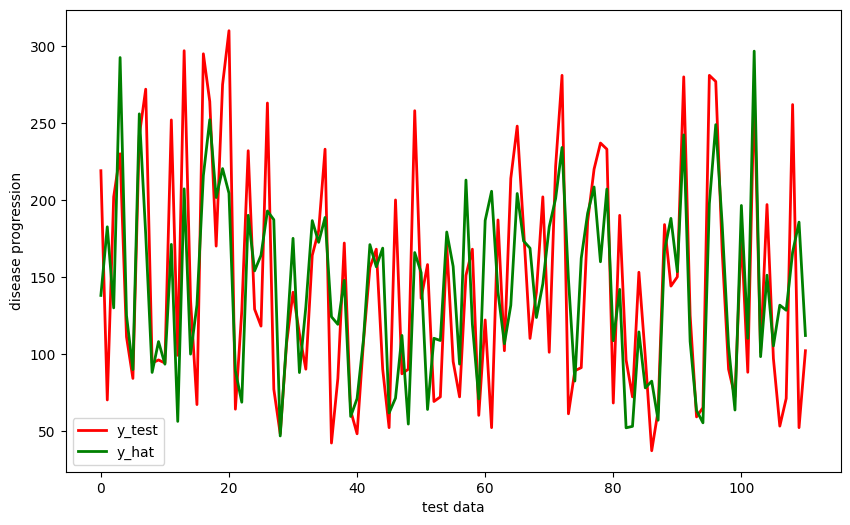

r2: 0.4849058889476757
r2_score: 0.4849058889476757
MAE: 41.54850685988059
MSE: 2848.3106508475043
RMSE: 53.36956671032195


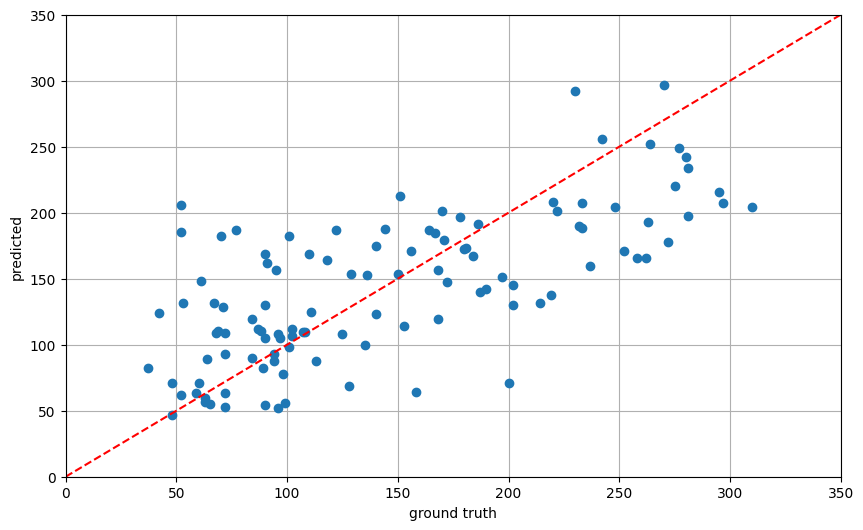

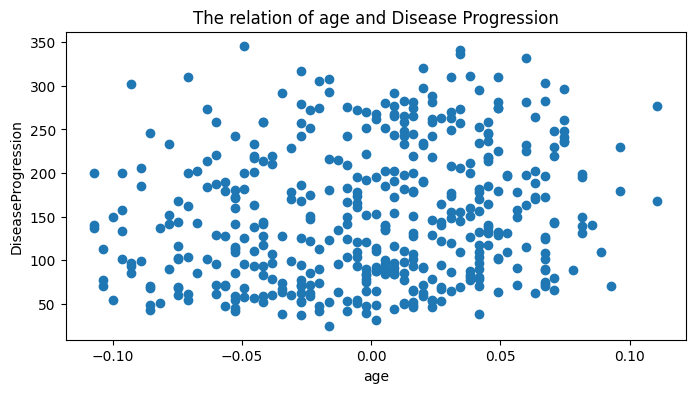

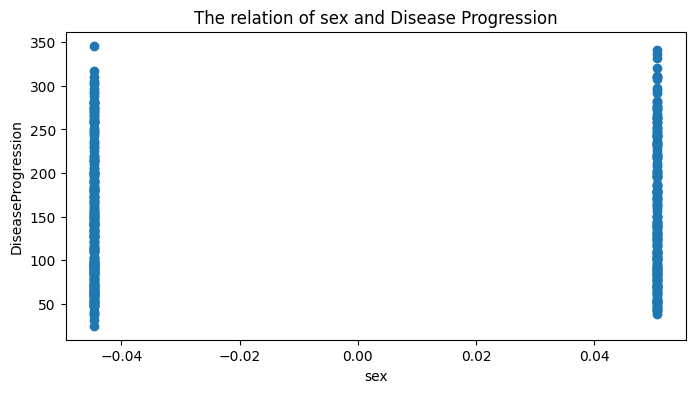

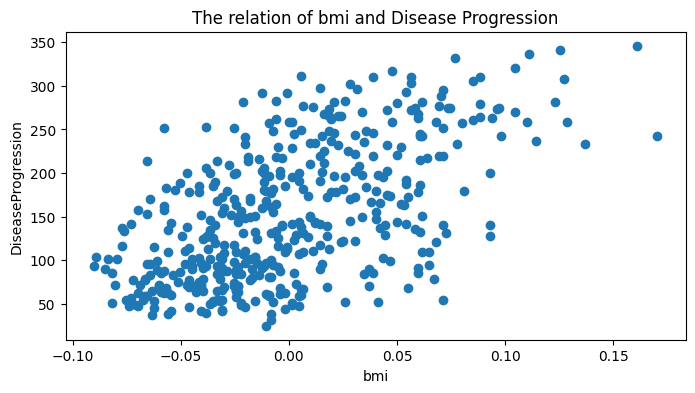

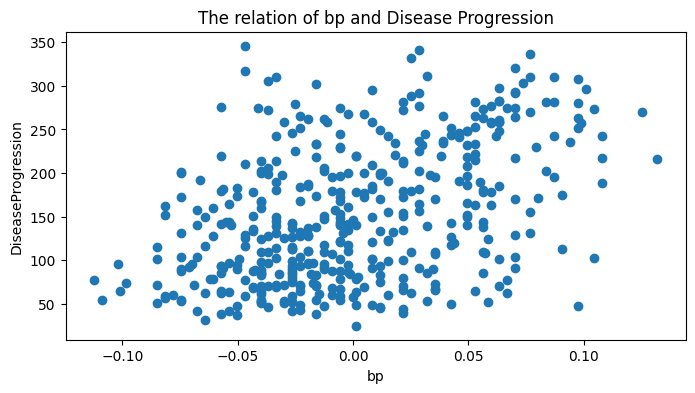

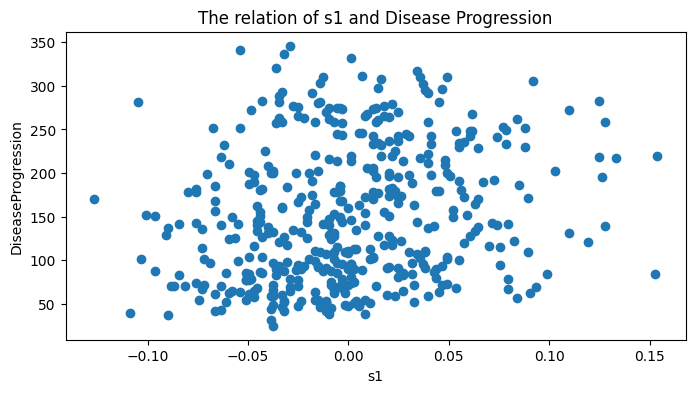

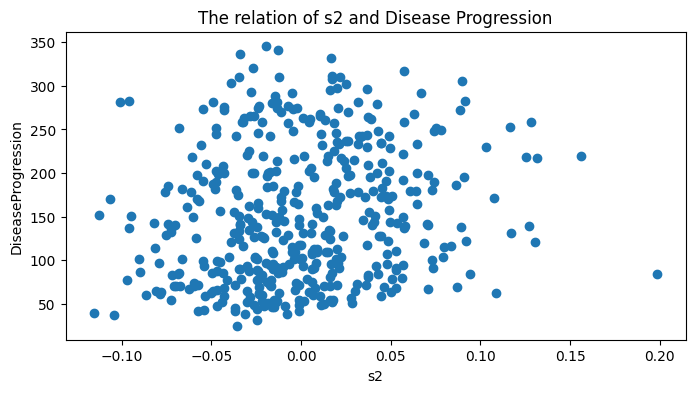

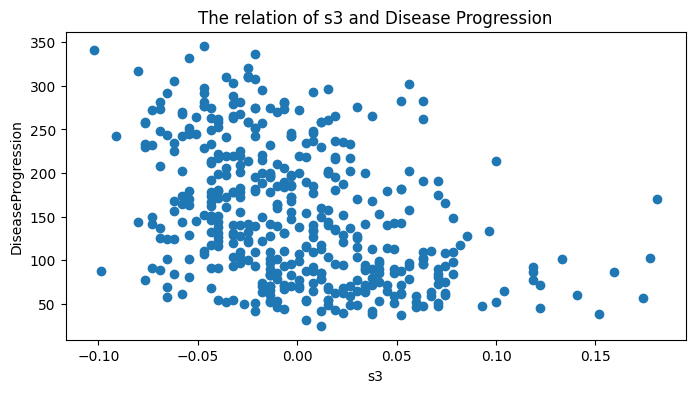

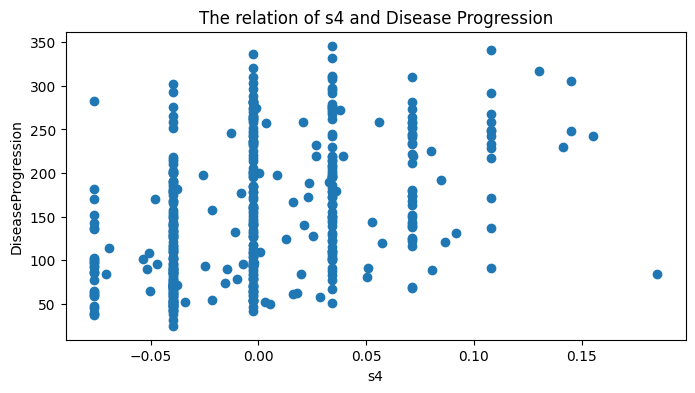

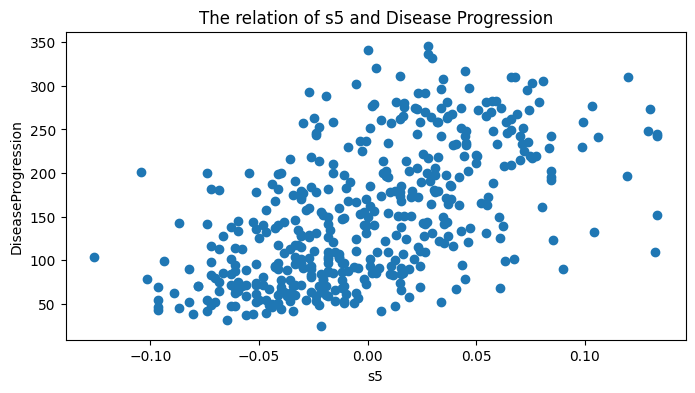

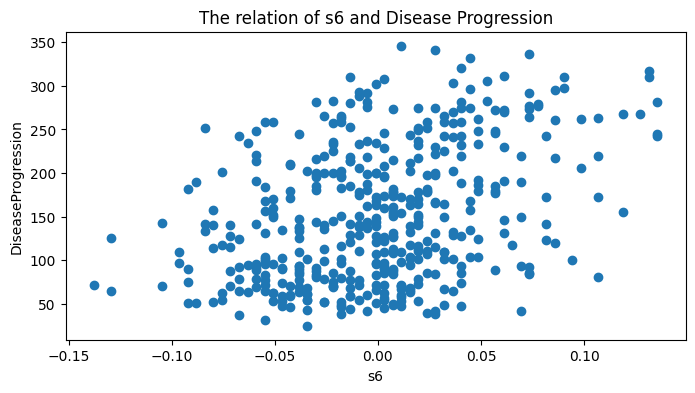

求解截距项为： [152.07653297]
求解系数为： [[975.27698313]]


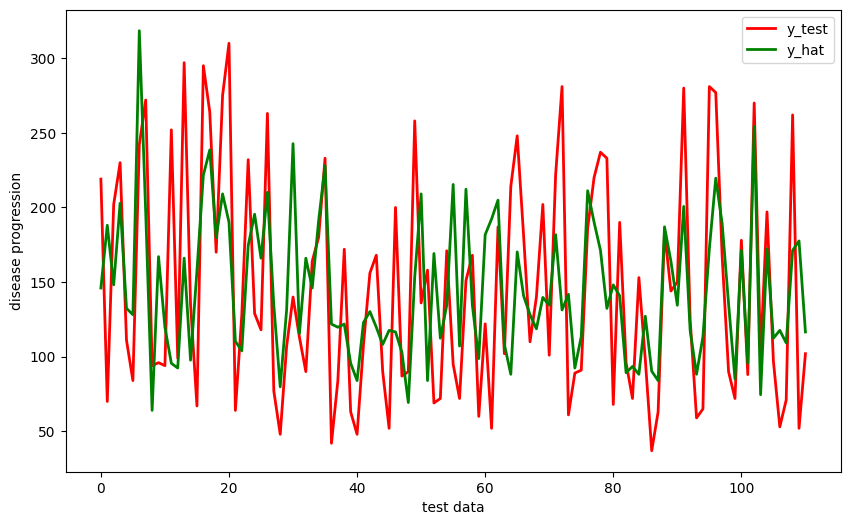

r2: 0.3172099449537781
r2_score: 0.3172099449537781
MAE: 49.80505217504619
MSE: 3775.6172015007783
RMSE: 61.44605114652022


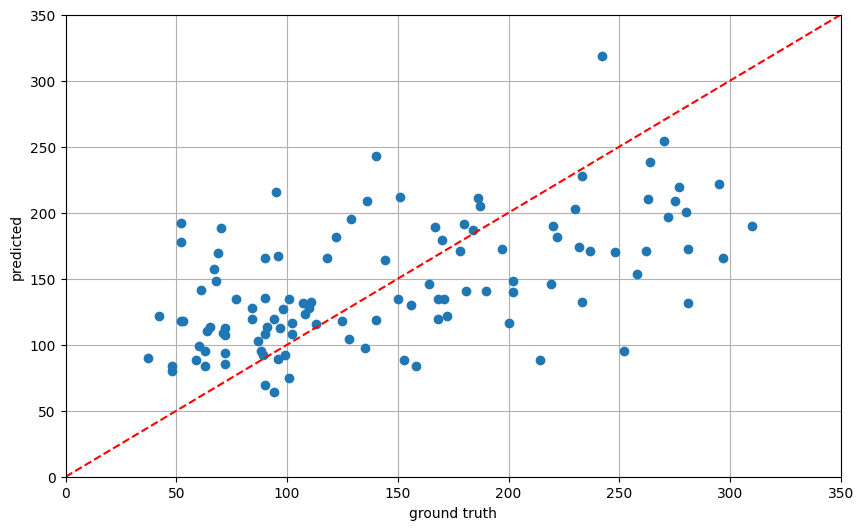

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 加载糖尿病数据集
diabetes = load_diabetes()
print(diabetes.keys())
print(diabetes.feature_names)

# 转换为DataFrame格式
diabetes_data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_target = pd.DataFrame(diabetes.target, columns=["DiseaseProgression"])
print(diabetes_data.head())
print(diabetes_target.head())

# 切分数据集
X_train, X_test, y_train, y_test = train_test_split(diabetes_data, diabetes_target, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 建立线性回归模型
lr = LinearRegression()
lr.fit(X_train, y_train)
print('求解截距项为：', lr.intercept_)
print('求解系数为：', lr.coef_)

# 模型预测
y_hat = lr.predict(X_test)
print(y_hat[:10])

# 模型评估
plt.figure(figsize=(10, 6))
t = np.arange(len(X_test))
plt.plot(t, y_test, 'r', linewidth=2, label='y_test')
plt.plot(t, y_hat, 'g', linewidth=2, label='y_hat')
plt.legend()
plt.xlabel('test data')
plt.ylabel('disease progression')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test, y_hat, 'o')
plt.plot([0, 350], [0, 350], color="red", linestyle="--", linewidth=1.5)
plt.axis([0, 350, 0, 350])
plt.xlabel('ground truth')
plt.ylabel('predicted')
plt.grid()

print("r2:", lr.score(X_test, y_test))
print("r2_score:", metrics.r2_score(y_test, y_hat))
print("MAE:", metrics.mean_absolute_error(y_test, y_hat))
print("MSE:", metrics.mean_squared_error(y_test, y_hat))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

# 绘制每个特征值与结果之间的关系散点图
for feature in diabetes.feature_names:
    plt.figure(figsize=(8, 4))
    plt.scatter(diabetes_data[feature], diabetes_target)
    plt.xlabel(feature)
    plt.ylabel('DiseaseProgression')
    plt.title(f'The relation of {feature} and Disease Progression')
    plt.show()

# 假设bmi是最相关的特征
X = diabetes_data[["bmi"]]
y = diabetes_target

# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 创建线性回归模型并训练
lr = LinearRegression()
lr.fit(X_train, y_train)
print('求解截距项为：', lr.intercept_)
print('求解系数为：', lr.coef_)

# 模型预测
y_hat = lr.predict(X_test)

# 预测结果可视化
plt.figure(figsize=(10, 6))
t = np.arange(len(X_test))
plt.plot(t, y_test, 'r', linewidth=2, label='y_test')
plt.plot(t, y_hat, 'g', linewidth=2, label='y_hat')
plt.legend()
plt.xlabel('test data')
plt.ylabel('disease progression')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test, y_hat, 'o')
plt.plot([0, 350], [0, 350], color="red", linestyle="--", linewidth=1.5)
plt.axis([0, 350, 0, 350])
plt.xlabel('ground truth')
plt.ylabel('predicted')
plt.grid()

# 评价模型
print("r2:", lr.score(X_test, y_test))
print("r2_score:", metrics.r2_score(y_test, y_hat))
print("MAE:", metrics.mean_absolute_error(y_test, y_hat))
print("MSE:", metrics.mean_squared_error(y_test, y_hat))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_hat)))
